# **Task 02_____CIFAR-10**


Description CIFAR-10 is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

Kaggle is hosting a CIFAR-10 leaderboard for the machine learning community to use for fun and practice. You can see how your approach compares to the latest research methods on Rodrigo Benenson's classification results page.

In [7]:

# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

In [2]:
# load train and test dataset

    # load dataset
(x_train, trainY), (x_test, testY) = cifar10.load_data()
    # one hot encode target values
y_train = to_categorical(trainY)
y_test = to_categorical(testY)


170498071/170498071 [==============================] - 3s 0us/step


In [3]:
# scale pixels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# For normalization image pixel values are divided by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [ ]:
#CNN 01

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
    # compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
625/625 [==============================] - 66s 104ms/step - loss: 1.8417 - accuracy: 0.3382 - val_loss: 1.6149 - val_accuracy: 0.4230
Epoch 2/25
625/625 [==============================] - 56s 89ms/step - loss: 1.5155 - accuracy: 0.4524 - val_loss: 1.4875 - val_accuracy: 0.4708
Epoch 3/25
625/625 [==============================] - 57s 91ms/step - loss: 1.3837 - accuracy: 0.5038 - val_loss: 1.3904 - val_accuracy: 0.5130
Epoch 4/25
625/625 [==============================] - 60s 96ms/step - loss: 1.2961 - accuracy: 0.5400 - val_loss: 1.2618 - val_accuracy: 0.5554
Epoch 5/25
625/625 [==============================] - 55s 88ms/step - loss: 1.2203 - accuracy: 0.5692 - val_loss: 1.2437 - val_accuracy: 0.5641
Epoch 6/25
625/625 [==============================] - 56s 89ms/step - loss: 1.1499 - accuracy: 0.5952 - val_loss: 1.2380 - val_accuracy: 0.5613
Epoch 7/25
625/625 [==============================] - 57s 90ms/step - loss: 1.0926 - accuracy: 0.6169 - val_loss: 1.1244 - val_accuracy

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 68.910


In [ ]:
#CNN 02

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

# Compile model
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
model.compile(loss= 'categorical_crossentropy' , optimizer=optimizer, metrics=[ 'accuracy' ])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                      

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
625/625 [==============================] - 215s 342ms/step - loss: 2.2716 - accuracy: 0.1343 - val_loss: 2.2046 - val_accuracy: 0.2238
Epoch 2/25
625/625 [==============================] - 213s 340ms/step - loss: 2.0386 - accuracy: 0.2510 - val_loss: 2.0408 - val_accuracy: 0.2558
Epoch 3/25
625/625 [==============================] - 222s 355ms/step - loss: 1.9172 - accuracy: 0.3009 - val_loss: 1.8687 - val_accuracy: 0.3351
Epoch 4/25
625/625 [==============================] - 213s 341ms/step - loss: 1.7834 - accuracy: 0.3521 - val_loss: 1.7520 - val_accuracy: 0.3757
Epoch 5/25
625/625 [==============================] - 213s 341ms/step - loss: 1.6906 - accuracy: 0.3814 - val_loss: 1.6841 - val_accuracy: 0.3977
Epoch 6/25
625/625 [==============================] - 212s 339ms/step - loss: 1.6175 - accuracy: 0.4080 - val_loss: 1.5693 - val_accuracy: 0.4346
Epoch 7/25
625/625 [==============================] - 211s 338ms/step - loss: 1.5541 - accuracy: 0.4349 - val_loss: 1.5546 -

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 67.290


In [4]:
#VGG1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
    # compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
625/625 [==============================] - 196s 311ms/step - loss: 2.1485 - accuracy: 0.1924 - val_loss: 1.8184 - val_accuracy: 0.3494
Epoch 2/25
625/625 [==============================] - 183s 292ms/step - loss: 1.7739 - accuracy: 0.3429 - val_loss: 1.6284 - val_accuracy: 0.4053
Epoch 3/25
625/625 [==============================] - 182s 292ms/step - loss: 1.6404 - accuracy: 0.3943 - val_loss: 1.5379 - val_accuracy: 0.4385
Epoch 4/25
625/625 [==============================] - 182s 291ms/step - loss: 1.5356 - accuracy: 0.4361 - val_loss: 1.4515 - val_accuracy: 0.4732
Epoch 5/25
625/625 [==============================] - 191s 306ms/step - loss: 1.4558 - accuracy: 0.4681 - val_loss: 1.3542 - val_accuracy: 0.5141
Epoch 6/25
625/625 [==============================] - 181s 290ms/step - loss: 1.4020 - accuracy: 0.4897 - val_loss: 1.2895 - val_accuracy: 0.5367
Epoch 7/25
625/625 [==============================] - 182s 290ms/step - loss: 1.3506 - accuracy: 0.5123 - val_loss: 1.2712 -

In [ ]:
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 73.650


In [10]:
#LeNet

lenet = Sequential()
lenet.add(Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'))  #C1
lenet.add(AveragePooling2D())  #S1
lenet.add(Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'))  #C2
lenet.add(AveragePooling2D()) #S2
lenet.add(Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid')) #C3
lenet.add(Flatten()) #Flatten
lenet.add(Dense(84, activation='relu')) #F1
lenet.add(Dense(10, activation='softmax')) #Output layer
    # compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
lenet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(lenet.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_3 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 2, 2, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 480)              

In [11]:
lenet.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Epoch 1/25
625/625 [==============================] - 47s 74ms/step - loss: 2.2300 - accuracy: 0.1671 - val_loss: 2.1283 - val_accuracy: 0.2190
Epoch 2/25
625/625 [==============================] - 42s 67ms/step - loss: 1.9663 - accuracy: 0.2972 - val_loss: 1.8613 - val_accuracy: 0.3357
Epoch 3/25
625/625 [==============================] - 42s 68ms/step - loss: 1.7957 - accuracy: 0.3597 - val_loss: 1.7480 - val_accuracy: 0.3762
Epoch 4/25
625/625 [==============================] - 40s 64ms/step - loss: 1.6771 - accuracy: 0.4020 - val_loss: 1.6357 - val_accuracy: 0.4134
Epoch 5/25
625/625 [==============================] - 41s 65ms/step - loss: 1.5899 - accuracy: 0.4318 - val_loss: 1.5877 - val_accuracy: 0.4324
Epoch 6/25
625/625 [==============================] - 40s 65ms/step - loss: 1.5229 - accuracy: 0.4568 - val_loss: 1.5300 - val_accuracy: 0.4526
Epoch 7/25
625/625 [==============================] - 40s 64ms/step - loss: 1.4739 - accuracy: 0.4769 - val_loss: 1.5177 - val_accuracy:

In [12]:
_, acc = lenet.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 56.780


In [13]:
#hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

In [14]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))
    # compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
AlexNet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(AlexNet.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 60)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 60)          32460     
                                                                 
 conv2d_15 (Conv2D)          (None, 2, 2, 30)         

In [15]:
AlexNet.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 12s 18ms/step - loss: 2.3011 - accuracy: 0.1177 - val_loss: 2.2989 - val_accuracy: 0.1457
Epoch 2/100
625/625 [==============================] - 11s 18ms/step - loss: 2.2956 - accuracy: 0.1491 - val_loss: 2.2897 - val_accuracy: 0.1720
Epoch 3/100
625/625 [==============================] - 10s 17ms/step - loss: 2.2745 - accuracy: 0.1651 - val_loss: 2.2404 - val_accuracy: 0.1643
Epoch 4/100
625/625 [==============================] - 11s 18ms/step - loss: 2.1584 - accuracy: 0.1795 - val_loss: 2.0868 - val_accuracy: 0.1996
Epoch 5/100
625/625 [==============================] - 10s 15ms/step - loss: 2.0604 - accuracy: 0.1996 - val_loss: 2.0187 - val_accuracy: 0.2178
Epoch 6/100
625/625 [==============================] - 10s 17ms/step - loss: 2.0218 - accuracy: 0.2100 - val_loss: 1.9894 - val_accuracy: 0.2261
Epoch 7/100
625/625 [==============================] - 11s 18ms/step - loss: 1.9881 - accuracy: 0.2233 - val_loss: 1.9855 - val_ac

In [16]:
_, acc = AlexNet.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 52.340


In [17]:
#history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

In [18]:
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_data=(x_test, y_test), verbose=0)

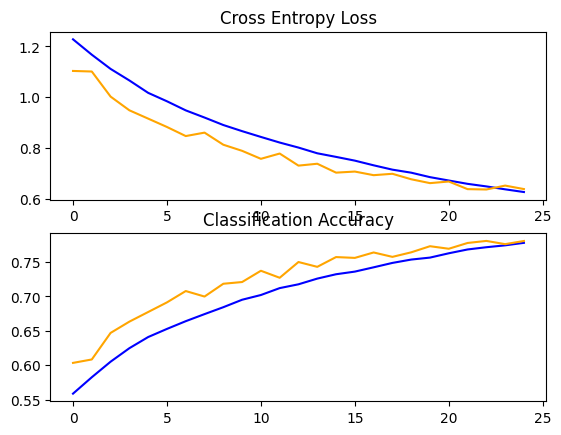

In [19]:
# plot diagnostic learning curves

    # plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '_plot.png')
